#Importing Libraries

In [2]:
# import system libs
import os
import itertools


# import data handling tools
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.preprocessing.image import load_img

#import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


#Displaying Images

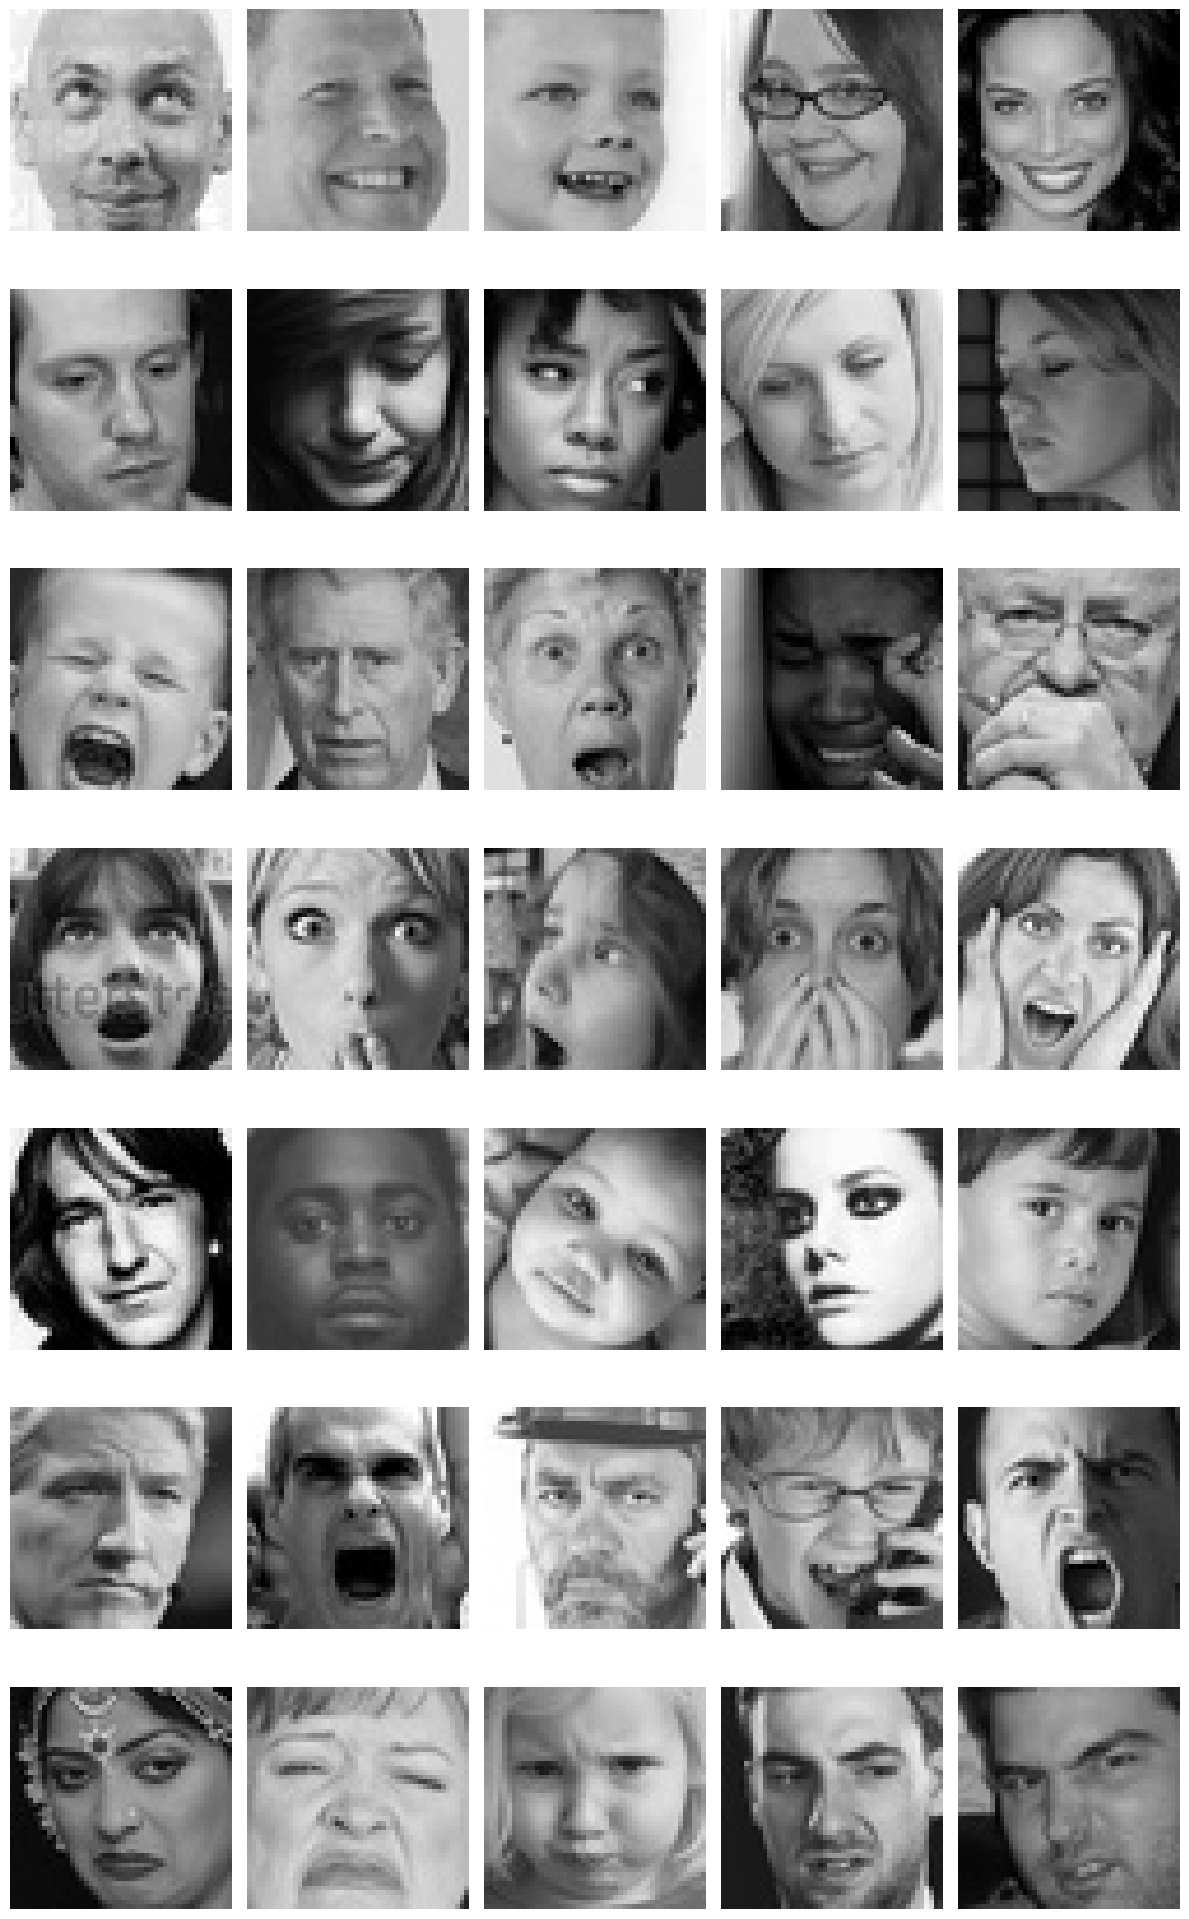

In [3]:
# display some images for every different expression

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
folder_path = "images-2/images/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(folder_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(folder_path + "train/" + expression + "/" +os.listdir(folder_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")
        plt.grid(False)
        plt.axis(False)


plt.tight_layout()
plt.show()


In [4]:
# count number of train and validation images for each expression
print("Training images")
for expression in os.listdir(folder_path + "train"):
    print(str(len(os.listdir(folder_path + "train/" + expression))) + " " + expression + " images")
    
print("\nValidation images")
for expression in os.listdir(folder_path + "validation"):
    print(str(len(os.listdir(folder_path + "validation/" + expression))) + " " + expression + " images")

Training images
7164 happy images
4938 sad images
4103 fear images
3205 surprise images
4982 neutral images
3993 angry images
436 disgust images

Validation images
1825 happy images
1139 sad images
1018 fear images
797 surprise images
1216 neutral images
960 angry images
111 disgust images


#Making Training and Validation Data

In [5]:
# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(folder_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(folder_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


#Model Building

In [6]:
no_of_classes = 7

model = Sequential()

# 1st CNN layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 4,478,727 (17.08 MB)

 Trainable params: 4,474,759 (17.07 MB)

 Non-trainable params: 3,968 (15.50 KB)

#Train the model

In [7]:
checkpoint = ModelCheckpoint(
    "face/model.keras",  # Use '.keras' extension instead of '.h5'
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
    )

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 48

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    x=train_generator,  # Pass the generator directly to the 'x' argument
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,  # Pass the generator directly to the 'validation_data' argument
    validation_steps=validation_generator.n//validation_generator.batch_size,
    callbacks=callbacks_list
)

Epoch 1/48
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 927ms/step - accuracy: 0.2533 - loss: 1.9722
Epoch 1: val_accuracy improved from -inf to 0.32244, saving model to face/model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 223s 981ms/step - accuracy: 0.2536 - loss: 1.9714 - val_accuracy: 0.3224 - val_loss: 2.1261 - learning_rate: 0.0010
Epoch 2/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 3:28 930ms/step - accuracy: 0.4062 - loss: 1.6865
Epoch 2: val_accuracy did not improve from 0.32244
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step - accuracy: 0.4062 - loss: 0.8470 - val_accuracy: 0.1538 - val_loss: 1.6953 - learning_rate: 0.0010
Epoch 3/48


2024-04-01 19:34:23.759704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-01 19:34:23.822176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 910ms/step - accuracy: 0.4294 - loss: 1.4796
Epoch 3: val_accuracy improved from 0.32244 to 0.46307, saving model to face/model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 217s 963ms/step - accuracy: 0.4295 - loss: 1.4794 - val_accuracy: 0.4631 - val_loss: 1.5124 - learning_rate: 0.0010
Epoch 4/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 3:19 892ms/step - accuracy: 0.4844 - loss: 1.3864
Epoch 4: val_accuracy improved from 0.46307 to 0.53846, saving model to face/model.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - accuracy: 0.4844 - loss: 0.6963 - val_accuracy: 0.5385 - val_loss: 0.9195 - learning_rate: 0.0010
Epoch 5/48


2024-04-01 19:38:01.492441: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-01 19:38:01.544954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 906ms/step - accuracy: 0.5072 - loss: 1.2912
Epoch 5: val_accuracy did not improve from 0.53846
225/225 ━━━━━━━━━━━━━━━━━━━━ 216s 960ms/step - accuracy: 0.5072 - loss: 1.2911 - val_accuracy: 0.4879 - val_loss: 1.3415 - learning_rate: 0.0010
Epoch 6/48
  1/225 ━━━━━━━━━━━━━━━━━━━━ 3:26 920ms/step - accuracy: 0.5391 - loss: 1.2413
Epoch 6: val_accuracy did not improve from 0.53846
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - accuracy: 0.5391 - loss: 0.6234 - val_accuracy: 0.4231 - val_loss: 0.9309 - learning_rate: 0.0010
Epoch 7/48


2024-04-01 19:41:38.570769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-01 19:41:38.625558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 905ms/step - accuracy: 0.5459 - loss: 1.1822
Epoch 7: val_accuracy did not improve from 0.53846

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 ━━━━━━━━━━━━━━━━━━━━ 216s 960ms/step - accuracy: 0.5459 - loss: 1.1822 - val_accuracy: 0.5092 - val_loss: 1.2422 - learning_rate: 0.0010
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


#Analyse the result

In [10]:
# visualise training and testing accuracy and loss

def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (24, 6))
    plt.subplot(1,2,1)
    plt.suptitle('Optimizer : Adam', fontsize=20)
    plt.xlabel('Epoch',fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.grid(True)
    plt.title('Accuracy')
    plt.legend(loc='upper right')


    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch',fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.title('Loss')
    plt.show()

# print best epoch with best accuracy on validation

def get_best_epcoh(history):
    valid_acc = history.history['val_accuracy']
    best_epoch = valid_acc.index(max(valid_acc)) + 1
    best_acc =  max(valid_acc)
    print('Best Validation Accuracy Score {:0.5f}, is for epoch {}'.format( best_acc, best_epoch))
    return best_epoch

In [11]:
model.save("my_project.keras")

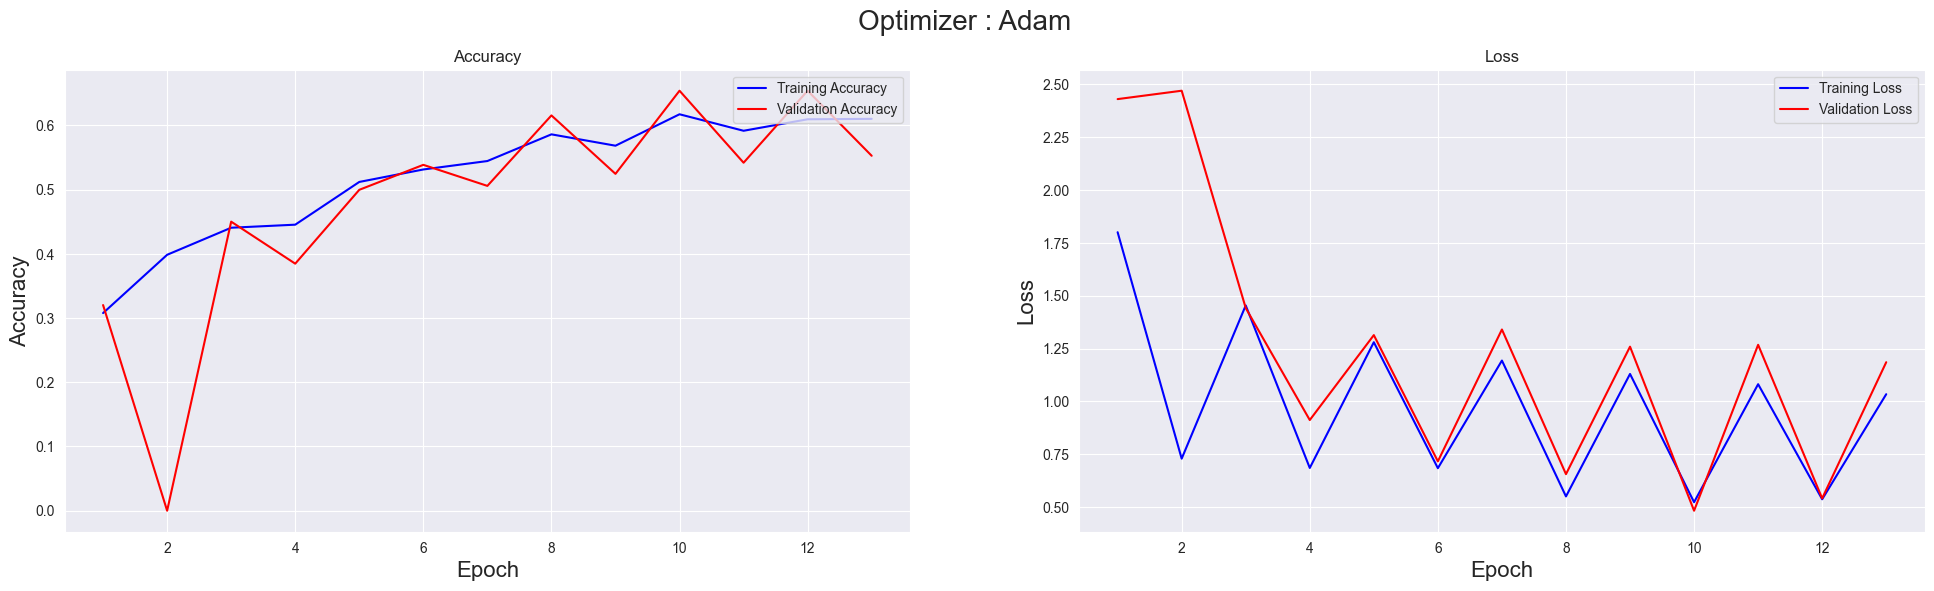

Best Validation Accuracy Score 0.65385, is for epoch 10


In [10]:
plot_results(history)
best_epoch =get_best_epcoh(history)

56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 231ms/step


<Figure size 640x480 with 0 Axes>

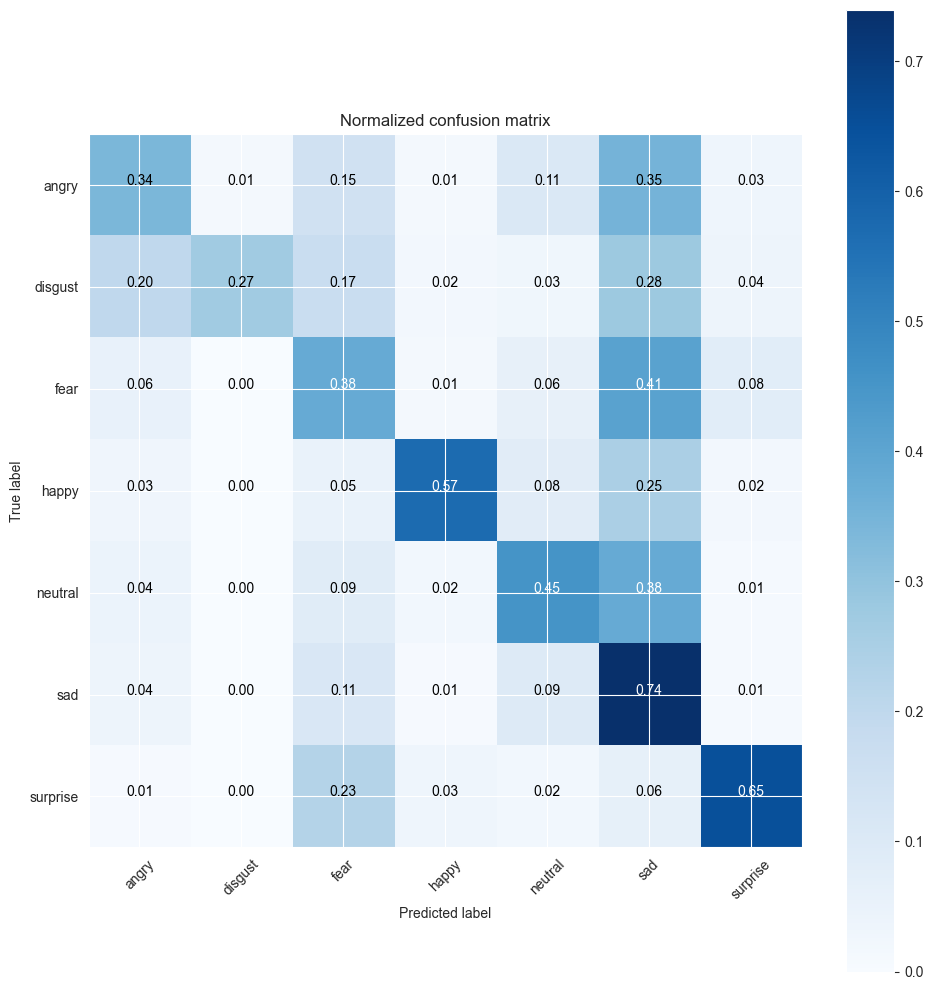

In [11]:
# show the confusion matrix of our predictions

# compute predictions
predictions = model.predict(validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()


def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [16]:
# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall accuracy: {accuracy * 100:.2f}%")

Overall accuracy: 52.25%
